The hyperscanning pipeline

Visual inspection, some filtering

In [3]:
import mne
import matplotlib.pyplot as plt


subj_n = 1
folder_pth = {'baseline_folder': 'C:/FEL/ING/diplomka/data/baseline_stare/kamdu/',
       'trust_game_folder': 'C:/FEL/ING/diplomka/data/TG/kamdu/'
}

file_tags = {'baseline': 'HYSCAN_GD_JS_2024-12-09_13-12-25_Segment_0.edf', #segment_0 is a short record. Seems like whole record is in segment_1
             'trust_game': 'HYSCAN_GD_JS_2024-12-09_13-24-23_Segment_0.edf',
             'baseline_bad': 'HYSCAN_GD_JS_2024-11-08_10-24-49_Segment_1_bad_raw.fif'

}

raw_data = mne.io.read_raw_edf(folder_pth['trust_game_folder']+file_tags['trust_game'], preload = True)

# raw_data.plot()
# plt.show()

# raw_data.save(folder_pth['baseline_folder']+file_tags['baseline_bad'], overwrite = True)


Extracting EDF parameters from C:\FEL\ING\diplomka\data\TG\kamdu\HYSCAN_GD_JS_2024-12-09_13-24-23_Segment_0.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 868703  =      0.000 ...   848.343 secs...


Effective window size : 2.000 (s)
Plotting power spectral density (dB=True).


c:\Users\Martin\AppData\Local\Programs\Python\Python310\lib\site-packages\mne\viz\utils.py:158: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  (fig or plt).show(**kwargs)


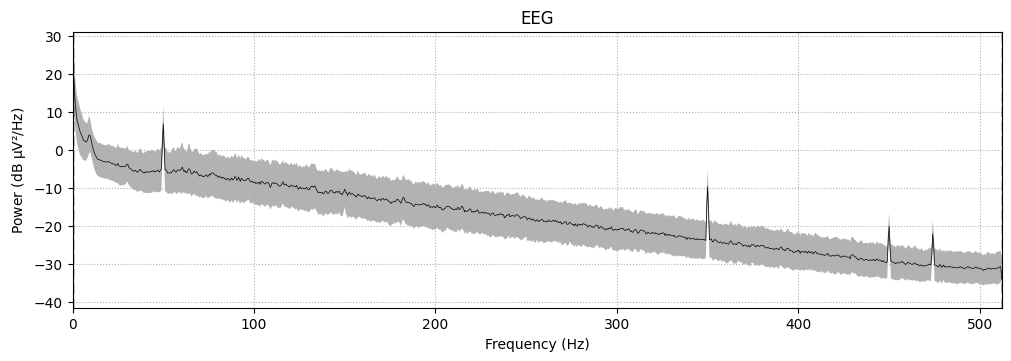

In [4]:
## Check PSD for 50 Hz and its harmonics noise

spectrum = raw_data.compute_psd()
spectrum.plot(average=True, picks="all", exclude="bads", amplitude=False)


Filter 50 Hz and harmonics

Filtering raw data in 1 contiguous segment
Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 0.50 Hz
- Upper transition bandwidth: 0.50 Hz
- Filter length: 6759 samples (6.601 s)

Effective window size : 2.000 (s)
Plotting power spectral density (dB=True).


c:\Users\Martin\AppData\Local\Programs\Python\Python310\lib\site-packages\mne\viz\utils.py:158: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  (fig or plt).show(**kwargs)


Effective window size : 2.000 (s)
Plotting power spectral density (dB=True).


c:\Users\Martin\AppData\Local\Programs\Python\Python310\lib\site-packages\mne\viz\utils.py:158: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  (fig or plt).show(**kwargs)


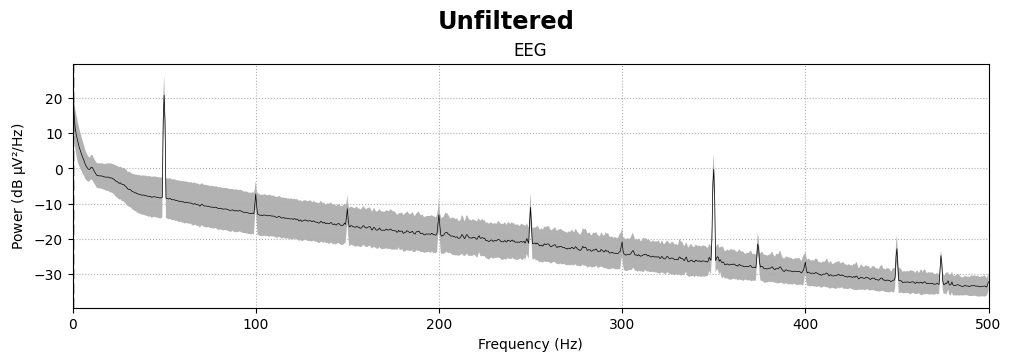

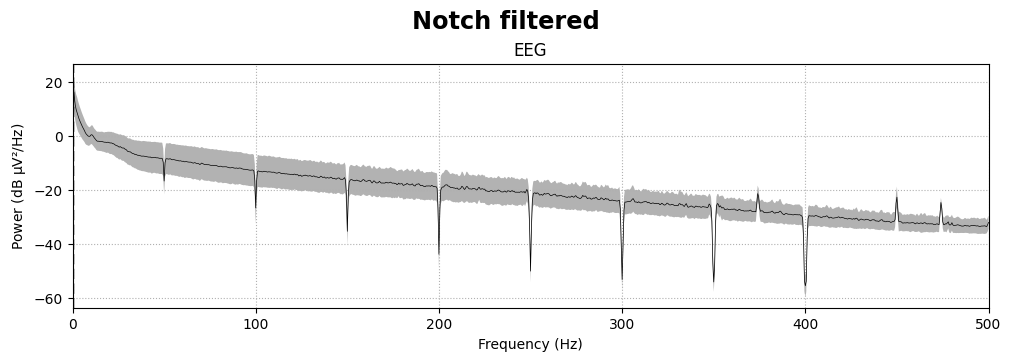

In [2]:
freqs = (50,100,150,200,250,300,350,400)
notch_filt = raw_data.copy().notch_filter(freqs = freqs)

for title, data in zip(["Un", "Notch "], [raw_data, notch_filt]):
    fig = data.compute_psd(fmax=500).plot(
        average=True, amplitude=False, picks="data", exclude="bads"
    )
    fig.suptitle(f"{title}filtered", size="xx-large", weight="bold")



Now remove bad epochs

In [ ]:
%matplotlib qt

notch_filt.plot()
notch_filt.save(folder_pth['baseline_folder']+file_tags['baseline_bad'], overwrite = True)





Using matplotlib as 2D backend.
Overwriting existing file.
Writing C:\FEL\ING\diplomka\data\baseline_stare\1\HYSCAN_GD_JS_2024-11-08_10-24-49_Segment_1_bad_raw.fif
Closing C:\FEL\ING\diplomka\data\baseline_stare\1\HYSCAN_GD_JS_2024-11-08_10-24-49_Segment_1_bad_raw.fif
[done]


Channels marked as bad:
none


Prepare the data for analysis